In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.naive_bayes import GaussianNB

%matplotlib inline

In [19]:
# import mlflow and set experiment tracking
import mlflow

mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("wifi-indoor-experiment-1")

<Experiment: artifact_location='./mlruns/1', experiment_id='1', lifecycle_stage='active', name='wifi-indoor-experiment-1', tags={}>

In [20]:
# data url
file_path = "data/wireless_indoor.csv"
wifi_df = pd.read_csv(file_path)

# preview first 5 samples
wifi_df.head()

,signal_strength_1,signal_strength_2,signal_strength_3,signal_strength_4,signal_strength_5,signal_strength_6,signal_strength_7,wifi_class
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1


In [21]:
# check dataframe datatypes
wifi_df.dtypes

signal_strength_1    int64
signal_strength_2    int64
signal_strength_3    int64
signal_strength_4    int64
signal_strength_5    int64
signal_strength_6    int64
signal_strength_7    int64
wifi_class           int64
dtype: object

In [22]:
# checking 'wifi_class' values
wifi_df["wifi_class"].value_counts()

1    500
2    500
3    500
4    500
Name: wifi_class, dtype: int64

In [23]:
# find missing data
wifi_df.isnull().sum()

signal_strength_1    0
signal_strength_2    0
signal_strength_3    0
signal_strength_4    0
signal_strength_5    0
signal_strength_6    0
signal_strength_7    0
wifi_class           0
dtype: int64

In [24]:
# size and shape of the data
print("Size:",len(wifi_df))
print("data shape:",wifi_df.shape)

Size: 2000
data shape: (2000, 8)


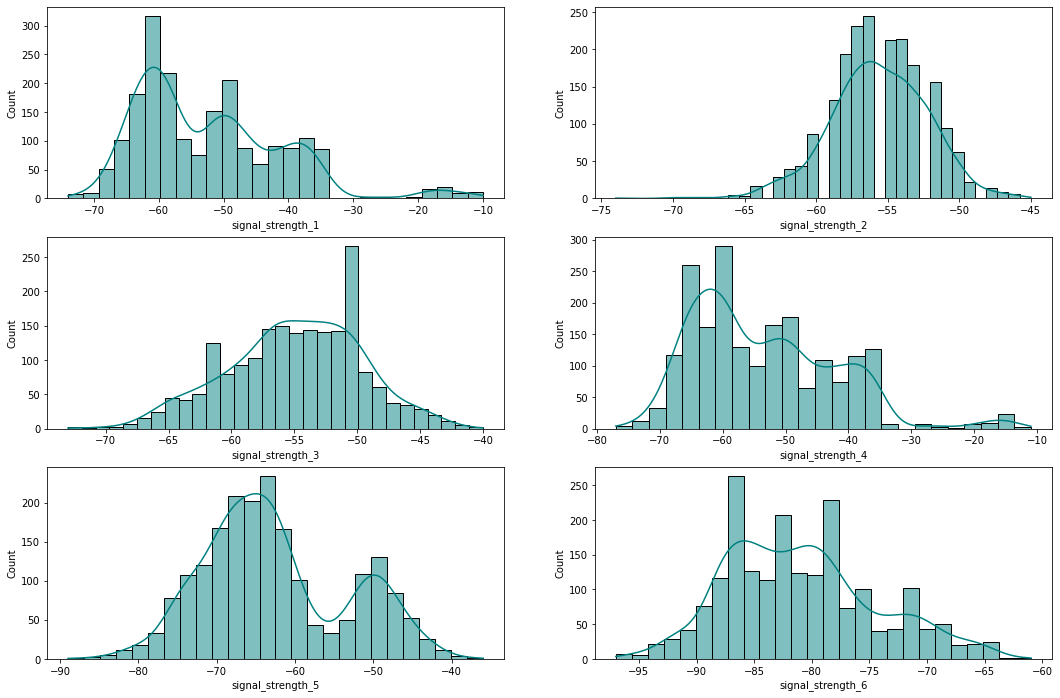

In [25]:
# visualize the histogram for all predictors
predictors = wifi_df.columns.tolist()[:-1]
fig, axes = plt.subplots(3,2,figsize=(18,12))
index_ = 0
for row in range(3):
  for col in range(2):
    sns.histplot(data=wifi_df, x=predictors[index_], kde=True, 
                 color="teal",ax=axes[row,col])
    index_ +=1
plt.show()

In [26]:
def split_data(dataframe):
  X = dataframe.iloc[:,:-1]
  y = dataframe.iloc[:,-1]

  X_train,X_test,y_train,y_test = train_test_split(X, y,
                                                   test_size=0.2, random_state=4)
  
  return (X_train,X_test,y_train,y_test)

In [27]:
def naive_bayes_model(x_train, y_train, var_smoothing=10e-9):
  gnb= GaussianNB(var_smoothing=var_smoothing)

  gnb.fit(x_train, y_train)
  return gnb

In [28]:
with mlflow.start_run():
    

    
    X_train,X_test,y_train,y_test = split_data(wifi_df)
    variance_smoothing = 0.001
    gnaive_model = naive_bayes_model(X_train,y_train,variance_smoothing)
    predictions = gnaive_model.predict(X_test)
    
    # accuracy score, precision, recall, f1 score and confusion matrix
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average="weighted")
    recall = recall_score(y_test, predictions,  average="weighted")
    f1_score = f1_score(y_test, predictions, average="weighted")
    confusion_mat = confusion_matrix(y_test, predictions)
    
    mlflow.set_tag("ML Engineer","Mohamed Akel")
    mlflow.set_param("Full Dataset Path",file_path)
    mlflow.set_param("var_smoothing",variance_smoothing)
    mlflow.log_metric("accuracy", accuracy)


In [29]:

print("accuracy:",accuracy)
print("precision:",precision)
print("recall:",recall)
print("f1_score:",f1_score)
print("confusion_mat:",confusion_mat)

accuracy: 0.9825
precision: 0.9831123659240925
recall: 0.9825
f1_score: 0.9824999999999998
confusion_mat: [[103   0   0   0]
 [  0  95   6   0]
 [  0   1  95   0]
 [  0   0   0 100]]
